# Исследование объявлений о продаже квартир

# Содержание

- Шаг 1. Загрузим данные и подготовим их к анализу
- Шаг 2. Предобработка данных
- Шаг 3. Расчёты и добавление результатов в таблицу
- Шаг 4. Исследовательский анализ данных
- Шаг 5. Общий вывод

# Шаг 1. Загрузим данные и подготовим их к анализу

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 100

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [3]:
df_list = [df]
for df in df_list:
    print('Первые 5 строк')
    print('-'*50)
    display(df.head())
    print('-'*50)
    print('Размер датафрейма: (строк:столбцов) {}'.format(df.shape))
    print('-'*50)
    print('Типы данных и общая информация')
    print(df.info())
    print('-'*50)
    print('Наличие дубликатов: {}'.format(df.duplicated().sum()))
    print('-'*50)
    print('Наличие пропусков')
    print('-'*50)
    print(df.isna().sum())
    print('Стат данные')
    print('-'*50)
    display(df.describe())

Первые 5 строк
--------------------------------------------------


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


--------------------------------------------------
Размер датафрейма: (строк:столбцов) (23699, 22)
--------------------------------------------------
Типы данных и общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


Всего у нас 23699 записи. Для целого ряда столбцов есть пропущенные значения и некорректный тип данных. По ряду признаков есть аномальные значения.

# Шаг 2. Предобработка данных

In [4]:
df['locality_name'].value_counts() # Начну с ключего столбца, т.к большинство вопросов в исследовании завязано на локации.
df.dropna(subset=['locality_name'], inplace=True) # Удаляю записи, где нет локации.

In [5]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # Привожу к типу даты.

In [7]:
df[df['ceiling_height'] > 4].sort_values('ceiling_height').tail(5) # Есть несколько значений, с явной ошибкой в кратности. Оставим пока без изменений.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17857,1,"3,900,000.00",56.00,2017-12-22,3,27.00,5.00,33.00,4,False,False,False,NaN,NaN,Санкт-Петербург,"41,030.00","15,543.00",0.00,NaN,0.00,NaN,73.00
21377,19,"4,900,000.00",42.00,2017-04-18,1,27.50,24.00,37.70,19,False,False,False,11.00,2.00,Санкт-Петербург,"42,742.00","9,760.00",0.00,NaN,0.00,NaN,61.00
22336,19,"9,999,000.00",92.40,2019-04-05,2,32.00,6.00,55.50,5,False,False,False,16.50,4.00,Санкт-Петербург,"18,838.00","3,506.00",0.00,NaN,3.00,511.00,NaN
3148,14,"2,900,000.00",75.00,2018-11-12,3,32.00,3.00,53.00,2,NaN,False,False,8.00,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22869,0,"15,000,000.00",25.00,2018-07-25,1,100.00,5.00,14.00,5,True,False,False,11.00,5.00,Санкт-Петербург,"34,963.00","8,283.00",1.00,223.00,3.00,30.00,19.00


In [8]:
df['floors_total'].fillna(df['floors_total'].median(), inplace=True)  # заменяю пропуски на медиальные значения.
# Т.к. пропусков не много, и количество этажей в многоэтажном доме не является ключевым фактором цены.

In [10]:
df['is_apartment'].value_counts()
df['is_apartment'] = df['is_apartment'].fillna(False) # Заменаю все пропуски на False, т.к. аппартаменты новое явление и появилось не  так давно.

In [13]:
df['living_area'].value_counts()
living_ratio = df['living_area'].mean() / df['total_area'].mean()  # Заменяю пропуски на средние значения.
df['living_area'].fillna(living_ratio * df['total_area'], inplace=True) 

In [14]:
df['kitchen_area'].value_counts()
kitchen_ratio = df['kitchen_area'].mean() / df['total_area'].mean() # Заменяю пропуски на средние значения.
df['kitchen_area'].fillna(kitchen_ratio * df['total_area'], inplace=True)

In [15]:
df['last_price'].value_counts()
df['last_price'] = df['last_price'].astype(int)

Перевожу в целые числа, пропуски заменяю на 0.

In [16]:
df['balcony'].value_counts()
df['balcony'] = df['balcony'].fillna(0)     
df['balcony'] = df['balcony'].astype(int)

In [17]:
df['parks_around3000'].value_counts()
df['parks_around3000'] = df['parks_around3000'].fillna(value=0).astype(int)

In [18]:
df['ponds_around3000'].value_counts()
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0).astype(int)

In [19]:
df['days_exposition'].value_counts()
df['days_exposition'] = df['days_exposition'].fillna(0).astype(int)

In [20]:
df['airports_nearest'].value_counts()     
df['airports_nearest'].isna().mean()*100

23.39957716701903

In [21]:
df['cityCenters_nearest'].value_counts()  
df['airports_nearest'].isna().mean()*100

23.39957716701903

In [22]:
df['parks_nearest'].value_counts() 
df['parks_nearest'].isna().mean()*100

65.90274841437632

In [23]:
df['ponds_nearest'].value_counts()
df['ponds_nearest'].isna().mean()*100

61.58562367864694

Оставляю пропуски, как есть. Их доля существенна, и замена на что-то, может быть неккоректна.

# Шаг 3. Расчёты и добавление результатов в таблицу

In [24]:
# Добавляю столбец со стоимостью квадратного метра (sm_price) и привожу его в целочисленный тип:
df['sm_price'] = df['last_price'] / df['total_area']
df['sm_price'] = df['sm_price'].astype(int)

In [25]:
# Создаю столбец дня недели:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

In [26]:
# Создаю столбец месяца:
df['month_exposition'] = df['first_day_exposition'].dt.month

In [27]:
# Создаю столбец года:
df['year_exposition'] = df['first_day_exposition'].dt.year

In [28]:
# Cоздаю функцию для заполнения нового столбца с этажом:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_type'] = df.apply(floor_group, axis=1)

In [29]:
# Добавляю столбец с отношением жилой площади к общей (area_ratio), перевожу в % и привожу его в целочисленный тип:
df['area_ratio'] = df['living_area'] / df['total_area'] * 100
df['area_ratio'] = df['area_ratio'].fillna(value=0).astype(int)

In [30]:
# Добавляю столбец с отношением площади кухни к общей (kitchen_ratio), перевожу в % и привожу его в целочисленный тип:
df['kitchen_ratio'] = df['kitchen_area'] / df['total_area'] * 100
df['kitchen_ratio'] = df['kitchen_ratio'].fillna(value=0).astype(int)

# Шаг 4. Исследовательский анализ данных

## 4.1 Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

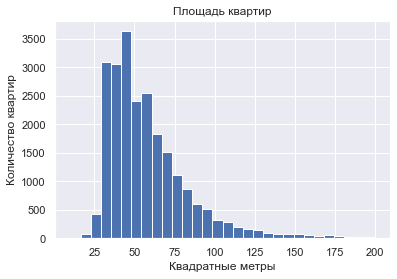

Наибольшие по площади варианты:
19540   900.00
12859   631.20
3117    631.00
15651   618.00
5358    590.00
Name: total_area, dtype: float64


count   23,650.00
mean        60.33
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

In [31]:
# Изучаю площадь:
plt.hist(df['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(df['total_area'].sort_values(ascending=False).head(5))
df['total_area'].describe()

средняя площадь 60 м2,что соответсвует среней площади 2-х комнатной квартире в РФ.

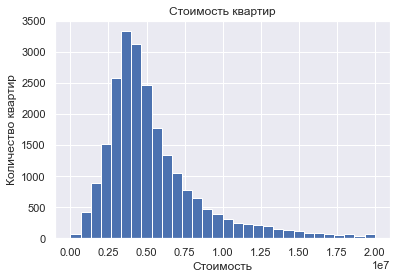

Наибольшие по цене варианты:
12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
Name: last_price, dtype: int32


count        23,650.00
mean      6,541,126.90
std      10,896,399.18
min          12,190.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,799,000.00
max     763,000,000.00
Name: last_price, dtype: float64

In [32]:
# Изучаю стоимость:
plt.hist(df['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене варианты:')
print(df['last_price'].sort_values(ascending=False).head(5))
df['last_price'].describe()

В Питере и его пригороде есть как бюджетное жилье ( около 3 млн. рублей), 
так и достаточное количество дорогово ( более 10 млн. рублей).

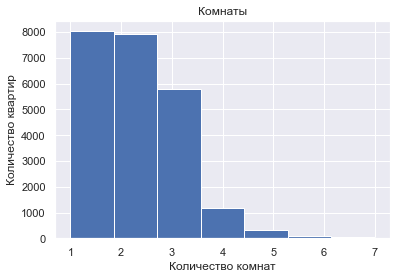

Наибольшие по числу комнат варианты:
14498    19
18848    16
5358     15
866      14
20829    14
Name: rooms, dtype: int64


count   23,650.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

In [33]:
# Изучаю число комнат:
plt.hist(df['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по числу комнат варианты:')
print(df['rooms'].sort_values(ascending=False).head(5))
df['rooms'].describe()

В основном на рынке Санкт-петербурга представлены 1-2-3 комнатные квартиры.

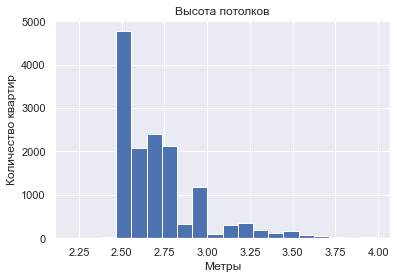

Наибольшие по высоте потолков варианты:
22869   100.00
3148     32.00
22336    32.00
21377    27.50
17857    27.00
Name: ceiling_height, dtype: float64


count   14,490.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

In [34]:
# Изучаю высоту потолков:
plt.hist(df.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(df['ceiling_height'].sort_values(ascending=False).head(5))
df['ceiling_height'].describe()

Медиальное значение высоты потолков - 2,65м. Среднее - 2.77 м.

## 4.2 Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа.

Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Время продажи (медиана): 95 

Время продажи (среднее): 181 



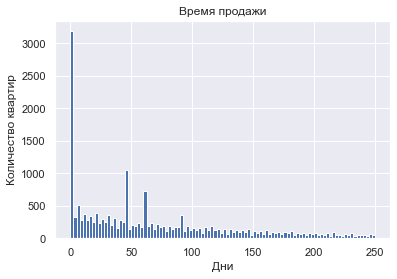

count   20,470.00
mean       180.75
std        219.78
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

In [35]:
# исключаю маркеры пустых значений:
print('Время продажи (медиана):', round(df.query('days_exposition != 0')['days_exposition'].median()),'\n')
print('Время продажи (среднее):', round(df.query('days_exposition != 0')['days_exposition'].mean()),'\n')

# Гистограма времени продажи:
plt.hist(df.query('days_exposition != 9999')['days_exposition'], bins=100, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

# Изучаю значения срока продажи:
df.query('days_exposition != 0')['days_exposition'].describe()

    Среднее время продажи - 180 дней. Медиальное время продажи - 95 дней. 
    Обычно квартира продаётся около 100 дней. 
    Быстрой продажей можно считать продажу за 45 дней и быстрее. 
    Необычно долгими продажи можно считать результат более 7 месяцев.

## 4.3 Уберём редкие и выбивающиеся значения. Опишем, какие особенности обнаружили.

In [36]:
# Функция для подсчёта границ с учетом 1.5 размаха:
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq

# Столбцы с выбросами:
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    df[col] = quartile_range(df, col)

# Возвращаем в целочисленный тип число комнат:
df['rooms'] = df['rooms'].fillna(0).astype(int)

# Изучаем, есть ли выбивающиеся значения:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sm_price,weekday_exposition,month_exposition,year_exposition,area_ratio,kitchen_ratio
count,"23,650.00","21,595.00","22,406.00","23,650.00","13,664.00","23,650.00","22,764.00","23,650.00","22,329.00","23,650.00","18,116.00","18,139.00","23,650.00","8,064.00","23,650.00","9,085.00","21,617.00","23,650.00","23,650.00","23,650.00","23,650.00","23,650.00","23,650.00"
mean,9.86,"4,838,942.09",54.33,2.01,2.68,10.67,31.52,5.89,9.42,0.59,"28,803.23","14,197.86",0.47,490.83,0.59,518.06,103.59,"99,431.80",2.57,6.40,"2,017.37",56.08,18.14
std,5.68,"2,217,282.22",19.35,0.99,0.18,6.58,13.76,4.88,3.18,0.96,"12,637.31","8,606.83",0.75,342.55,0.88,277.84,111.62,"50,337.94",1.79,3.49,1.04,10.11,6.96
min,0.00,"12,190.00",12.00,0.00,2.20,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,0.00,111.00,0.00,1.00,"2,014.00",2.00,2.00
25%,6.00,"3,300,000.00",39.40,1.00,2.50,5.00,18.70,2.00,7.00,0.00,"18,575.75","9,241.00",0.00,288.00,0.00,293.00,18.00,"76,614.25",1.00,3.00,"2,017.00",50.00,13.00
50%,9.00,"4,400,000.00",50.10,2.00,2.64,9.00,30.00,4.00,9.00,0.00,"26,756.50","13,105.00",0.00,454.50,0.00,502.00,61.00,"95,000.00",3.00,6.00,"2,017.00",57.00,17.00
75%,14.00,"6,000,000.00",65.50,3.00,2.76,16.00,40.59,8.00,11.00,1.00,"37,294.00","16,293.00",1.00,612.00,1.00,730.00,153.00,"114,274.00",4.00,10.00,"2,018.00",63.00,22.00
max,50.00,"11,894,400.00",114.20,5.00,3.21,60.00,76.70,33.00,19.45,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00",461.00,"1,907,500.00",6.00,12.00,"2,019.00",100.00,78.00


Ожидаемо, ощищенные данные стали немного более точными и предсказуемыми.

## 4.4 Какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

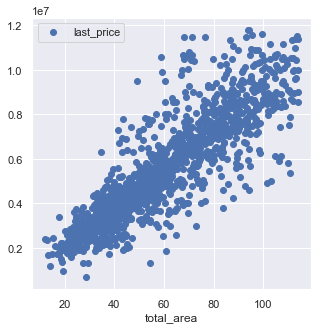

Корреляция цены и площади: 

            last_price  total_area
last_price        1.00        0.91
total_area        0.91        1.00 



In [37]:
# Зависимость цены от площади:
(
    df.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади:','\n')
print(df.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

Цена напрямую зависит от площади. Чем больше площадь, тем выше цена.

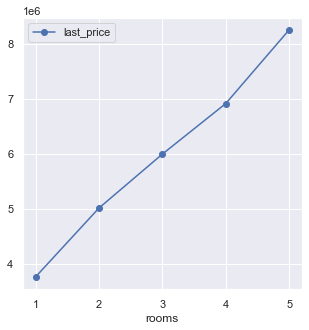

Корреляция цены и числа комнат: 

            last_price  rooms
last_price        1.00   0.54
rooms             0.54   1.00 



In [38]:
# Зависимость цены от числа комнат:
(
    df.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(df.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

Зависимость чем больше комнат, тем выше цена в целом сохраняется. Но в отличие от площади с меньшей корреляцией. Так как
количество однокомнатных квартир(студий) большой площащи на рынке растёт.

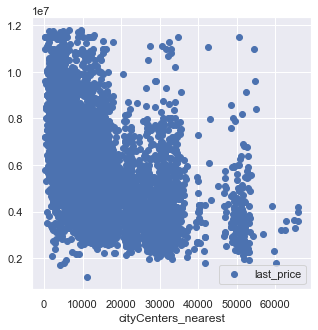

Корреляция цены и удалённости от центра: 

                     cityCenters_nearest  last_price
cityCenters_nearest                 1.00        0.71
last_price                          0.71        1.00 



In [39]:
# Зависимость цены от удалённости от центра:
(
    df.pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(df.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr(),'\n')

 Самые дорогие квартиры находятся в центре города. Однако и достаточно недалеко от центра, есть вполне буджетные варианты.

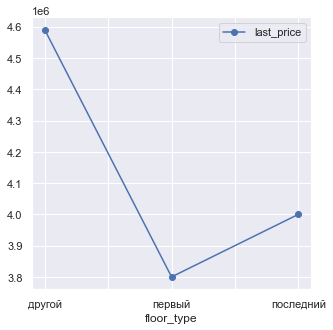

In [40]:
# Зависимость цены от этажа:
(
    df.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Квартиры на первом этаже самые дешёвые. 

Последний этаж также не является популярным. 

Самые дорогие квартиры находятся между первым и последним.

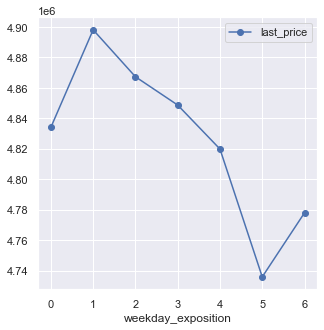

In [41]:
# Зависимость от дня размещения:
(
    df.pivot_table(index='weekday_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Квартиры с высокой ценой выставляются в начале недели. С низкой ценой в выходной. Предполагаю, что это связано с желанием побыстрее продать, всё таки в выходные у людей больше времени смотреть объявления. А дорогие квартиры продаются небыстро, и чтобы не платить за продвижение, эти объявления снимаются и выставляются заново в начале рабочей недели.

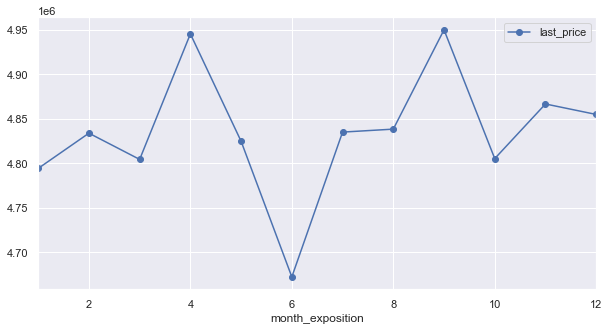

In [42]:
# Зависимость от месяца размещения:
(
    df.pivot_table(index='month_exposition', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()

Есть сезонная активность рынка весной и осенью, летом же осуществляются срочные незапланированные сделки, 
соответсвенно они и самые дешёвые.

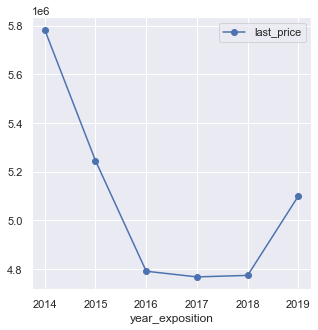

In [44]:
# Зависимость от года размещения:
(
    df.pivot_table(index='year_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Видно существенное падение цен с 2014 по 2017 год, затем некоторая стабильность до 2018 и резкий рост цен в 2019 году.

## 4.5 Выберим 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [45]:
# Сравниваю среднюю стоимость квадратного метра в топ-10 городов по числу объявлений:
city_ten = df['locality_name'].value_counts().head(10)
city_sm_price = df.query('locality_name in (@city_ten.index)').pivot_table(values='sm_price', index='locality_name')
city_sm_price = city_sm_price.astype(int)
city_sm_price.sort_values('sm_price', ascending=False)

,sm_price
locality_name,
Санкт-Петербург,114848
Пушкин,103125
деревня Кудрово,92473
посёлок Парголово,90175
посёлок Мурино,85751
посёлок Шушары,78676
Колпино,75424
Гатчина,68745
Всеволожск,68654


Ожидаемо лидерует Питер и исторический Пушкин, а отстают отдалённые от Питера города: Выборг и Всеволжск.

## 4.6 Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге ('locality_name'). Наша задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

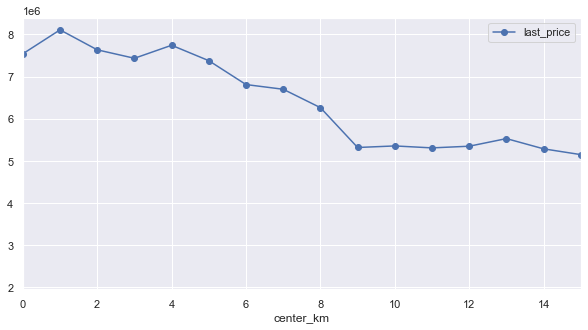

In [46]:
# Добавляю столбец с расстоянием до центра в км, округляем до целого:

df['center_km'] = df['cityCenters_nearest'] / 1000
df['center_km'] = df['center_km'].fillna(value=0).astype(int)

# Выбираю Санкт-Петербург, смотрю на график, где указана средняя стоимость для каждого км:
(
    df.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.show()

Определим центральную зону - 4 км.

## 4.7 Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы. Отличаются ли они от общих выводов по всему городу?

Площадь (медиана): 52 

Площадь в центре (медиана): 71 

Площадь (среднее): 56 

Площадь в центре (среднее): 72 



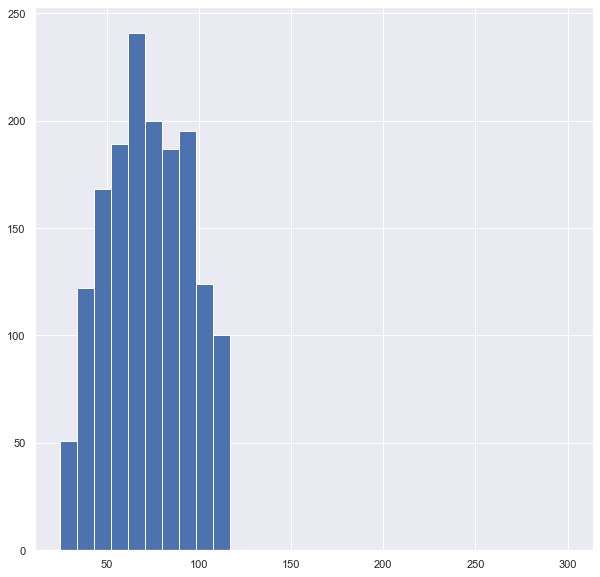

In [47]:
spb_center = df.query('(locality_name == "Санкт-Петербург") & (center_km <= 4)')

# Изучаю площадь:
print('Площадь (медиана):', round(df.query('locality_name == "Санкт-Петербург"')['total_area'].median()),'\n')
print('Площадь в центре (медиана):', round(spb_center['total_area'].median()),'\n')
print('Площадь (среднее):', round(df.query('locality_name == "Санкт-Петербург"')['total_area'].mean()),'\n')
print('Площадь в центре (среднее):', round(spb_center['total_area'].mean()),'\n')
spb_center['total_area'].hist(bins=30, range=(25,300), figsize=(10,10))
plt.show()

Число вариантов с ценой больше 10 млн: 1347
Цена квартиры (медиана): 5150000.0 

Цена квартиры в центре (медиана): 7600000.0 



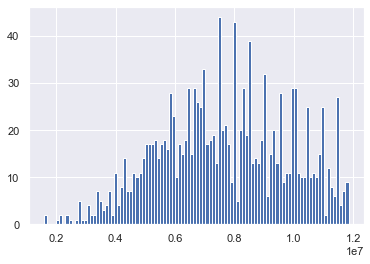

In [48]:
# Анализирую  стоимость:
spb_center['last_price'].hist(bins=100)
print('Число вариантов с ценой больше 10 млн:', spb_center.query('last_price > 1000000')['last_price'].count())
print('Цена квартиры (медиана):', df.query('locality_name == "Санкт-Петербург"')['last_price'].median(),'\n')
print('Цена квартиры в центре (медиана):', spb_center['last_price'].median(),'\n')
plt.show()

In [49]:
# Изучаю число комнат:
spb_rooms = df.query('(locality_name == "Санкт-Петербург") & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms.columns = ['count']
spb_rooms['rooms_ratio'] = spb_rooms['count'] / spb_rooms['count'].sum() * 100
spb_rooms_center = df.query('(locality_name == "Санкт-Петербург") & (center_km <= 7)  & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms_center.columns = ['center_count']
spb_rooms_center['center_rooms_ratio'] = spb_rooms_center['center_count'] / spb_rooms_center['center_count'].sum() * 100
rooms_alldata = pd.merge(spb_rooms, spb_rooms_center, 'left', on = 'rooms')
rooms_alldata['center_cap'] = round(rooms_alldata['center_count'] / rooms_alldata['count'] * 100)
print('Количество комнат (медиана):', df.query('locality_name == "Санкт-Петербург"')['rooms'].median(),'\n')
print('Количество комнат в центре (медиана):', spb_center['rooms'].median(),'\n')
display(rooms_alldata)

Количество комнат (медиана): 2.0 

Количество комнат в центре (медиана): 3.0 



,count,rooms_ratio,center_count,center_rooms_ratio,center_cap
rooms,,,,,
1,4937,32.01,581,16.18,12.00
2,5106,33.10,1119,31.17,22.00
3,4123,26.73,1165,32.45,28.00
4,968,6.28,504,14.04,52.00
5,291,1.89,221,6.16,76.00


In [50]:
# Изучаю высоту потолков:
print('Высота потолков (медиана):', df.query('locality_name == "Санкт-Петербург"')['ceiling_height'].median(),'\n')
print('Высота потолков в центре (медиана):', spb_center['ceiling_height'].median(),'\n')
print('Высота потолков (среднее):', df.query('locality_name == "Санкт-Петербург"')['ceiling_height'].mean(),'\n')
print('Высота потолков в центре (среднее):', spb_center['ceiling_height'].mean(),'\n')

Высота потолков (медиана): 2.65 

Высота потолков в центре (медиана): 3.0 

Высота потолков (среднее): 2.703441343171831 

Высота потолков в центре (среднее): 2.9544047619047595 



                                                    Выводы:
    Площадь квартир в центре в среднем на 16м2 больше.
    В центре в 2 раза меньше однокомнатных квартир.Более половины 4-х комнатных и 3/4 5- комнатных находится в центре.
    Высота потолков в центре выше почти на 5 см.

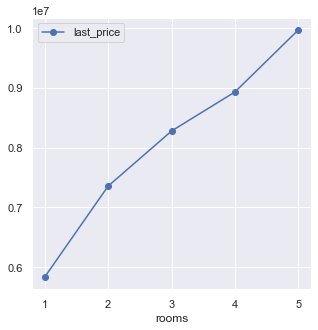

Корреляция цены и числа комнат: 

            last_price  rooms
last_price        1.00   0.39
rooms             0.39   1.00 



In [51]:
# Зависимость цены от числа комнат:
(
    spb_center.query('(rooms > 0) & (rooms < 7)').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(spb_center.query('(rooms > 0) & (rooms < 7)').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

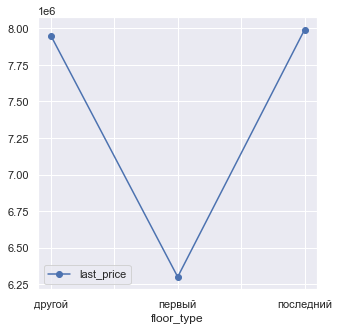

In [52]:
# Зависимость цены от этажа:
(
    spb_center.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

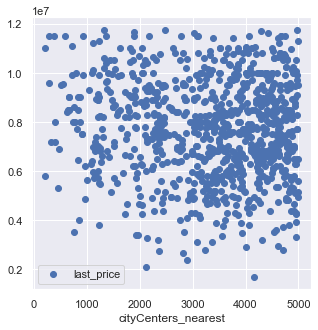

Корреляция цены и удалённости от центра: 

                     cityCenters_nearest  last_price
cityCenters_nearest                 1.00        0.08
last_price                          0.08        1.00 



In [53]:
# Зависимость цены от удалённости от центра:
(
    spb_center.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(spb_center.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr(),'\n')

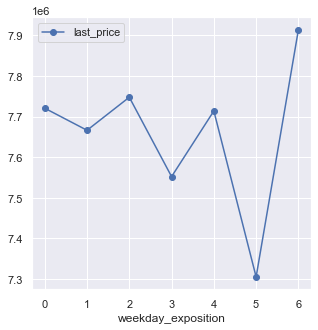

In [54]:
# Зависимость от дня размещения:
(
    spb_center.pivot_table(index='weekday_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

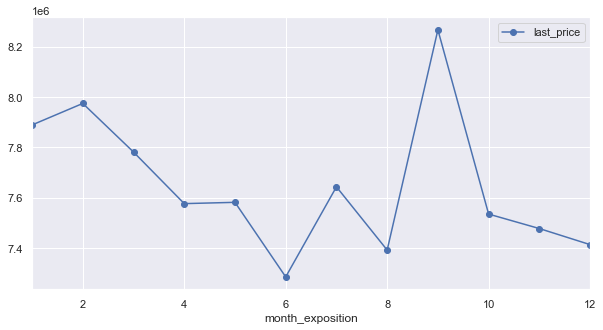

In [55]:
# Зависимость от месяца размещения:
(
    spb_center.pivot_table(index='month_exposition', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()

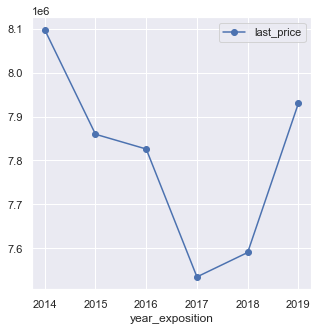

In [56]:
# Зависимость от года размещения:
(
    spb_center.pivot_table(index='year_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

                                     Выводы:
                                     
                                     
Корреляция цены в центре от числа комнат ниже, чем в  среднем по городу. В центре большое количество однокомнатных 
квартир большой площади.


В центре так же, как и по городу самый дешёвый этаж первый. При этом последний этаж гораздо дороже, чем в среднем по городу. Это обусловлено низкой исторической застройкой и последний, обычно третий этаж очень ценится за вид.


В центральной части города почти нет зависимости от удалённости от центра. Это связано с достаточно большой площадью исторического центра города. Точка центра достаточна условна, большое количество достопримечательностей делает достаточно много домов дорогой недвижимостью.


Продажи по дням в центре в отличие от всего города достаточно ровные по рабочей недели и с пиков в воскресенье.


Продажи по месяцам в целом соответствует тенденции по городу, отличие смещение начала сезона к февралю и осеннего начала сезона к сентябрю.


Продажи по годам в центре, в целом отражают картину по всему городу. Но с более плавным падением спроса в 2015,2016 годах. Думаю люди, вложившиеся в валюту, после падения рубля в 2014, ещё какое-то время поддерживали спрос на дорогую недвижимость.

# Шаг 5. Общий вывод

Я обработал полученный архив данных - обработал пропущенные значения там, где это необходимо, заменил типы данных на необходимые для удобной работы. Посчитал и добавил в таблицу цену квадратного метра жилья, вывел из даты дни недели, месяцы и года размещения объявлений, добавил категории по этажам квартир. Изучил следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах. 
На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные. Удалённость от центра, тоже важный параметр. Но в Санкт-Петербурге исторический центр достаточно большой и сильное падение цен начинается примерно от радиуса в 4 км от центра.
В центре города, в силу малоэтажности исторического центра, пользуется спросом последний этаж ( в отличие от общей статистики по городу).

Медиальное значение площади квартир в центре ( в радиусе 4 км от центра) - 71м2, что больше чем в по городу на 19м2.
Медиальное значение цена за квартиру в центре 7,1 млн. рублей, т.к по городу - 5,15 млн. рублей.
Медиальное значение количества комнат в центре 3, а в целом по городу- 2 комнаты.
Медиальное значение высоты потолков - 3м, по городу же 2,65м.